In [115]:
import lucem_illud as li

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy
#import scipy.cluster.hierarchy
import gensim
import requests
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib.cm
import seaborn as sns

%matplotlib inline

import itertools
import json
import ast

In [133]:
incels_main = pd.read_csv('data/main_resp.csv', index_col=0, converters={'tokens': lambda x: ast.literal_eval(x), 'normal_tokens': lambda x: ast.literal_eval(x), 'normal_tokens_POS': lambda x: ast.literal_eval(x)})

In [134]:
#remove NaN raw_text
incels_main = incels_main[incels_main.raw_text.notnull()]

In [135]:
parent_comments = incels_main[incels_main['comment_id'] == 0]
child_comments = incels_main[incels_main['comment_id'] != 0]

In [136]:
#count the number of comments in child_comments that has the same post_id as the parent_comments
child_comments_count = child_comments.groupby(['post_id']).count()

In [137]:
parent_comments

,post_id,comment_id,thread_title,thread_tag,thread_author,thread_time,username,user_label,post_time,raw_text,tokens,normal_tokens,normal_tokens_POS
id,,,,,,,,,,,,,
main_1_0,1,0,Useful Links,NaN,SergeantIncel,2018-10-01 17:24:20,SergeantIncel,Admincel,2018-10-01 17:24:20,List of useful links:\n\nRules & FAQ\nIntroduc...,"[List, of, useful, links, Rules, FAQ, Introduc...","[list, useful, links, rules, faq, introduction...","[(list, NN), (useful, JJ), (links, NNS), (rule..."
main_2_0,2,0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,MaxZM98,Socially constructed loser,2018-10-17 13:38:33,I was looking at myself in the gym mirror and ...,"[I, was, looking, at, myself, in, the, gym, mi...","[looking, gym, mirror, arms, look, like, nt, l...","[(looking, VBG), (gym, NN), (mirror, NN), (arm..."
main_3_0,3,0,Getting 6’7” aryan gigachad to sneak a 5’2” et...,[Experiment],SchrodingersDick,2018-10-16 01:46:42,SchrodingersDick,Skeleton Volume = Life Quality,2018-10-16 01:46:42,If there any sperm banks that disclose the man...,"[If, there, any, sperm, banks, that, disclose,...","[sperm, banks, disclose, man, looks, height, u...","[(sperm, NN), (banks, NNS), (disclose, VBP), (..."
main_4_0,4,0,7'2 Giga Chad - The Man Who Mogs Every Human i...,[SuicideFuel],rabitter,2018-10-17 09:22:55,rabitter,Incel Blanquist,2018-10-17 09:22:55,The fact that a man like this exists is unfilt...,"[The, fact, that, a, man, like, this, exists, ...","[fact, man, like, exists, unfiltered, suifuel,...","[(fact, NN), (man, NN), (like, IN), (exists, N..."
main_5_0,5,0,There's no way winning against your schoolbull...,[Venting],Doug,2018-10-17 07:52:30,Doug,Officer,2018-10-17 07:52:30,"If you beat him up, you gonna get smacked by h...","[If, you, beat, him, up, you, gon, na, get, sm...","[beat, going, to, smacked, friends, seen, psyc...","[(beat, VB), (going, VBG), (to, IN), (smacked,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
main_597_0,597,0,Sometimes ugly guys get women by winning them ...,NaN,FemaleInventionsLOL,2018-12-01 05:12:04,FemaleInventionsLOL,Mean words MONSTER.,2018-12-01 05:12:04,Ugly guys like BRAD PITT: https://answers.yaho...,"[Ugly, guys, like, BRAD, PITT, https://answers...","[ugly, guys, like, brad, pitt, https://answers...","[(ugly, JJ), (guys, NNS), (like, IN), (brad, U..."
main_598_0,598,0,Family adopts a live-in braindead BBC bull,[JFL],CyborgIncel,2018-09-11 17:27:59,CyborgIncel,dpdrcel,2018-09-11 17:27:59,Just look at the way his sister looks at him. ...,"[Just, look, at, the, way, his, sister, looks,...","[look, way, sister, looks, look, close, know, ...","[(look, VB), (way, NN), (sister, NN), (looks, ..."
main_599_0,599,0,"Another year, repeat of past failure",[SuicideFuel],a1mless,2018-12-01 04:29:54,a1mless,Recruit,2018-12-01 04:29:54,"Its been another year, another year of being a...","[Its, been, another, year, another, year, of, ...","[year, year, thinking, ahead, going, better, p...","[(year, NN), (year, NN), (thinking, NN), (ahea..."


In [201]:
parent_comments = parent_comments.drop_duplicates(['thread_title', 'thread_author', 'thread_time'])


In [202]:
#delete posts with no child comments
parent_comments = parent_comments[parent_comments['post_id'].isin(child_comments_count.index)]
parent_comments['child_comments'] = child_comments_count.loc[parent_comments['post_id'], 'comment_id'].values

In [203]:
parent_comments

,post_id,comment_id,thread_title,thread_tag,thread_author,thread_time,username,user_label,post_time,raw_text,tokens,normal_tokens,normal_tokens_POS,child_comments,joined tokens,reduced_tokens
id,,,,,,,,,,,,,,,,
main_2_0,2,0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,MaxZM98,Socially constructed loser,2018-10-17 13:38:33,I was looking at myself in the gym mirror and ...,"[I, was, looking, at, myself, in, the, gym, mi...","[looking, gym, mirror, arms, look, like, nt, l...","[(looking, VBG), (gym, NN), (mirror, NN), (arm...",15,looking gym mirror arms look like nt lift lift...,"[looking, gym, mirror, arms, look, like, nt, l..."
main_3_0,3,0,Getting 6’7” aryan gigachad to sneak a 5’2” et...,[Experiment],SchrodingersDick,2018-10-16 01:46:42,SchrodingersDick,Skeleton Volume = Life Quality,2018-10-16 01:46:42,If there any sperm banks that disclose the man...,"[If, there, any, sperm, banks, that, disclose,...","[sperm, banks, disclose, man, looks, height, u...","[(sperm, NN), (banks, NNS), (disclose, VBP), (...",37,sperm banks disclose man looks height ultimate...,"[sperm, man, looks, height, ultimate, gigachad..."
main_4_0,4,0,7'2 Giga Chad - The Man Who Mogs Every Human i...,[SuicideFuel],rabitter,2018-10-17 09:22:55,rabitter,Incel Blanquist,2018-10-17 09:22:55,The fact that a man like this exists is unfilt...,"[The, fact, that, a, man, like, this, exists, ...","[fact, man, like, exists, unfiltered, suifuel,...","[(fact, NN), (man, NN), (like, IN), (exists, N...",61,fact man like exists unfiltered suifuel defini...,"[fact, man, like, suifuel, definition, unmogga..."
main_5_0,5,0,There's no way winning against your schoolbull...,[Venting],Doug,2018-10-17 07:52:30,Doug,Officer,2018-10-17 07:52:30,"If you beat him up, you gonna get smacked by h...","[If, you, beat, him, up, you, gon, na, get, sm...","[beat, going, to, smacked, friends, seen, psyc...","[(beat, VB), (going, VBG), (to, IN), (smacked,...",34,beat going to smacked friends seen psycho tell...,"[beat, going, friends, seen, tell, bullied, nt..."
main_6_0,6,0,Do you approach or given up already?,[Experiment],itsmemario,2018-10-17 13:33:48,itsmemario,Banned,2018-10-17 13:33:48,title,[title],[title],"[(title, NN)]",39,title,[title]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
main_597_0,597,0,Sometimes ugly guys get women by winning them ...,NaN,FemaleInventionsLOL,2018-12-01 05:12:04,FemaleInventionsLOL,Mean words MONSTER.,2018-12-01 05:12:04,Ugly guys like BRAD PITT: https://answers.yaho...,"[Ugly, guys, like, BRAD, PITT, https://answers...","[ugly, guys, like, brad, pitt, https://answers...","[(ugly, JJ), (guys, NNS), (like, IN), (brad, U...",9,ugly guys like brad pitt https://answers.yahoo...,"[ugly, guys, like, ugly, guys, like, looks, li..."
main_598_0,598,0,Family adopts a live-in braindead BBC bull,[JFL],CyborgIncel,2018-09-11 17:27:59,CyborgIncel,dpdrcel,2018-09-11 17:27:59,Just look at the way his sister looks at him. ...,"[Just, look, at, the, way, his, sister, looks,...","[look, way, sister, looks, look, close, know, ...","[(look, VB), (way, NN), (sister, NN), (looks, ...",134,look way sister looks look close know wants gu...,"[look, way, looks, look, close, know, wants, f..."
main_599_0,599,0,"Another year, repeat of past failure",[SuicideFuel],a1mless,2018-12-01 04:29:54,a1mless,Recruit,2018-12-01 04:29:54,"Its been another year, another year of being a...","[Its, been, another, year, another, year, of, ...","[year, year, thinking, ahead, going, better, p...","[(year, NN), (year, NN), (thinking, NN), (ahea...",7,year year thinking ahead going better painful ...,"[year, year, thinking, ahead, going, better, p..."


In [140]:
parent_comments['joined tokens'] = parent_comments['normal_tokens'].apply(lambda x: ' '.join(x))


C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [204]:
CountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
incelsVects = CountVectorizer.fit_transform(parent_comments['joined tokens'])

In [206]:
print(incelsVects.shape)

(454, 6155)


In [213]:
incelTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(incelsVects)
incelsTF = incelTFTransformer.transform(incelsVects)

In [214]:
incelTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=10000, min_df=3, stop_words='english', norm='l2')
incelsTFVects = incelTFVectorizer.fit_transform(parent_comments['raw_text'])

In [217]:
numClusters = 5
km = sklearn.cluster.KMeans(n_clusters=numClusters, init='k-means++')
km.fit(incelsTFVects)

KMeans(n_clusters=5)

In [68]:
parent_comments['kmeans_predictions'] = km.labels_

In [209]:
parent_comments.head()

,post_id,comment_id,thread_title,thread_tag,thread_author,thread_time,username,user_label,post_time,raw_text,tokens,normal_tokens,normal_tokens_POS,child_comments,joined tokens,reduced_tokens
id,,,,,,,,,,,,,,,,
main_2_0,2,0,My arms are so small,[SuicideFuel],MaxZM98,2018-10-17 13:38:33,MaxZM98,Socially constructed loser,2018-10-17 13:38:33,I was looking at myself in the gym mirror and ...,"[I, was, looking, at, myself, in, the, gym, mi...","[looking, gym, mirror, arms, look, like, nt, l...","[(looking, VBG), (gym, NN), (mirror, NN), (arm...",15,looking gym mirror arms look like nt lift lift...,"[looking, gym, mirror, arms, look, like, nt, l..."
main_3_0,3,0,Getting 6’7” aryan gigachad to sneak a 5’2” et...,[Experiment],SchrodingersDick,2018-10-16 01:46:42,SchrodingersDick,Skeleton Volume = Life Quality,2018-10-16 01:46:42,If there any sperm banks that disclose the man...,"[If, there, any, sperm, banks, that, disclose,...","[sperm, banks, disclose, man, looks, height, u...","[(sperm, NN), (banks, NNS), (disclose, VBP), (...",37,sperm banks disclose man looks height ultimate...,"[sperm, man, looks, height, ultimate, gigachad..."
main_4_0,4,0,7'2 Giga Chad - The Man Who Mogs Every Human i...,[SuicideFuel],rabitter,2018-10-17 09:22:55,rabitter,Incel Blanquist,2018-10-17 09:22:55,The fact that a man like this exists is unfilt...,"[The, fact, that, a, man, like, this, exists, ...","[fact, man, like, exists, unfiltered, suifuel,...","[(fact, NN), (man, NN), (like, IN), (exists, N...",61,fact man like exists unfiltered suifuel defini...,"[fact, man, like, suifuel, definition, unmogga..."
main_5_0,5,0,There's no way winning against your schoolbull...,[Venting],Doug,2018-10-17 07:52:30,Doug,Officer,2018-10-17 07:52:30,"If you beat him up, you gonna get smacked by h...","[If, you, beat, him, up, you, gon, na, get, sm...","[beat, going, to, smacked, friends, seen, psyc...","[(beat, VB), (going, VBG), (to, IN), (smacked,...",34,beat going to smacked friends seen psycho tell...,"[beat, going, friends, seen, tell, bullied, nt..."
main_6_0,6,0,Do you approach or given up already?,[Experiment],itsmemario,2018-10-17 13:33:48,itsmemario,Banned,2018-10-17 13:33:48,title,[title],[title],"[(title, NN)]",39,title,[title]


In [219]:
terms = incelTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(numClusters):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 com
 https
 www
 reddit
 comments
 php
 jfl
 inceltears
 facebook
 video


Cluster 1:
 just
 women
 like
 men
 fucking
 10
 life
 foids
 look
 want


Cluster 2:
 foid
 http
 lol
 possible
 day
 fuck
 im
 going
 tbh
 death


Cluster 3:
 like
 people
 incels
 don
 think
 just
 incel
 chad
 work
 does


Cluster 4:
 title
 thread
 zero
 finish
 fired
 fit
 fix
 floor
 focus
 foid




In [220]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(incelsTFVects.toarray())
reduced_data = pca.transform(incelsTFVects.toarray())

In [105]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)

    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                color=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', color="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))


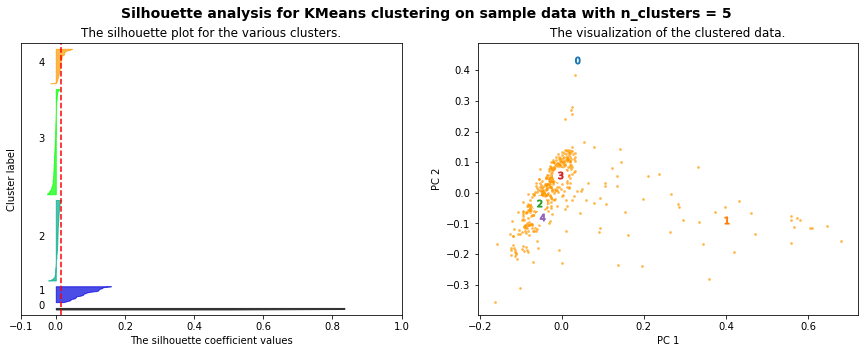

For n_clusters = 5, The average silhouette_score is : 0.014


In [225]:
X = incelsTFVects.toarray()
plotSilhouette(5, X)

In [226]:
incelCocoMat = incelsTFVects * incelsTFVects.T
incelCocoMat.setdiag(0)

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [227]:
linkage_matrix = scipy.cluster.hierarchy.linkage(incelCocoMat.toarray())

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


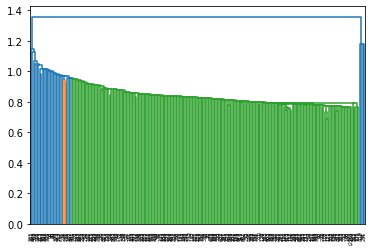

In [228]:
dendDat = scipy.cluster.hierarchy.dendrogram(linkage_matrix, get_leaves=True, p=200, truncate_mode='level')

In [230]:
hierarchicalClusters = scipy.cluster.hierarchy.fcluster(linkage_matrix, 3, 'maxclust')
hierarchicalClusters

array([1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [277]:
def dropMissing(words, vocab, exclude=[]):
    return [word for word in words if word in vocab and not word in exclude]

parent_comments['reduced_tokens'] = parent_comments['normal_tokens'].apply(lambda x: dropMissing(x, incelTFVectorizer.vocabulary_.keys(), ['like']))

In [278]:
dictionary = gensim.corpora.Dictionary(parent_comments['reduced_tokens'])

In [279]:
corpus = [dictionary.doc2bow(text) for text in parent_comments['reduced_tokens']]

In [280]:
gensim.corpora.MmCorpus.serialize('main_parents.mm', corpus)
parents_mm = gensim.corpora.MmCorpus('main_parents.mm')

In [288]:
parents_lda = gensim.models.ldamodel.LdaModel(corpus=parents_mm, id2word=dictionary, num_topics=10, alpha=0.1, eta=0.1)

In [290]:
ldaDF = pd.DataFrame({
    'title': parent_comments['thread_title'],
    'author': parent_comments['thread_author'],
    'topics': [parents_lda[dictionary.doc2bow(text)] for text in parent_comments['reduced_tokens']]
})

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(parents_lda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(parents_lda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF[1::100]

,title,author,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
id,,,,,,,,,,,,,
main_3_0,Getting 6’7” aryan gigachad to sneak a 5’2” et...,SchrodingersDick,"[(4, 0.84850496), (5, 0.13409626)]",0.000000,0.00000,0.00000,0.000000,0.848505,0.134096,0.00000,0.000000,0.000000,0.000000
main_111_0,Most of you could've gotten laid in your teens...,San Salvador,"[(8, 0.9756705)]",0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.975671,0.000000
main_226_0,Bluepill is an euphemism used for retards,copecel2,"[(0, 0.016672714), (1, 0.016670147), (2, 0.016...",0.016673,0.01667,0.01667,0.016669,0.016669,0.016670,0.01667,0.016671,0.849967,0.016672
main_389_0,As time passes we become more afraid of sex.,Crustaciouse,"[(4, 0.9774937)]",0.000000,0.00000,0.00000,0.000000,0.977494,0.000000,0.00000,0.000000,0.000000,0.000000
main_547_0,One of my friends now uses our lingo too,Lubricure,"[(4, 0.9756654)]",0.000000,0.00000,0.00000,0.000000,0.975665,0.000000,0.00000,0.000000,0.000000,0.000000


In [316]:
ldaDF.sort_values(by=['topic_4'], ascending=False).head(5)

,title,author,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
id,,,,,,,,,,,,,
main_236_0,Rapeceldom is the point of convergence between...,Leucosticte,"[(4, 0.9867595)]",0.0,0.0,0.0,0.0,0.986759,0.0,0.0,0.0,0.0,0.0
main_131_0,"I don't know that we really live in a ""matriar...",Leucosticte,"[(4, 0.9842063)]",0.0,0.0,0.0,0.0,0.984206,0.0,0.0,0.0,0.0,0.0
main_152_0,Women can never be true hobbyists,CopeWithTheRope,"[(4, 0.9836295)]",0.0,0.0,0.0,0.0,0.983630,0.0,0.0,0.0,0.0,0.0
main_532_0,X-mas is a holiday for cucks,owly,"[(4, 0.98042977)]",0.0,0.0,0.0,0.0,0.980430,0.0,0.0,0.0,0.0,0.0
main_389_0,As time passes we become more afraid of sex.,Crustaciouse,"[(4, 0.9774937)]",0.0,0.0,0.0,0.0,0.977494,0.0,0.0,0.0,0.0,0.0


In [314]:
N = 10
K = parents_lda.num_topics  # N documents, K topics
ldaDFV = ldaDF[:N][['topic_%d' %x for x in range(K)]]
ldaDFVisN = ldaDF[:N][['title']]
ldaDFVis = ldaDFV.to_numpy()
ldaDFVisNames = ldaDFVisN.to_numpy()
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
id,,,,,,,,,,
main_2_0,0.000000,0.939986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
main_3_0,0.000000,0.000000,0.000000,0.000000,0.848505,0.134096,0.000000,0.000000,0.000000,0.000000
main_4_0,0.935694,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
main_5_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.973521,0.000000,0.000000,0.000000,0.000000
main_6_0,0.050011,0.050024,0.050011,0.050011,0.050031,0.050030,0.050013,0.050011,0.050011,0.549849
main_7_0,0.000000,0.000000,0.000000,0.959080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
main_8_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.949989,0.000000
main_9_0,0.025011,0.025009,0.025004,0.025006,0.025010,0.774929,0.025007,0.025005,0.025006,0.025013
main_10_0,0.774902,0.025007,0.025008,0.025019,0.025007,0.025009,0.025010,0.025013,0.025011,0.025015


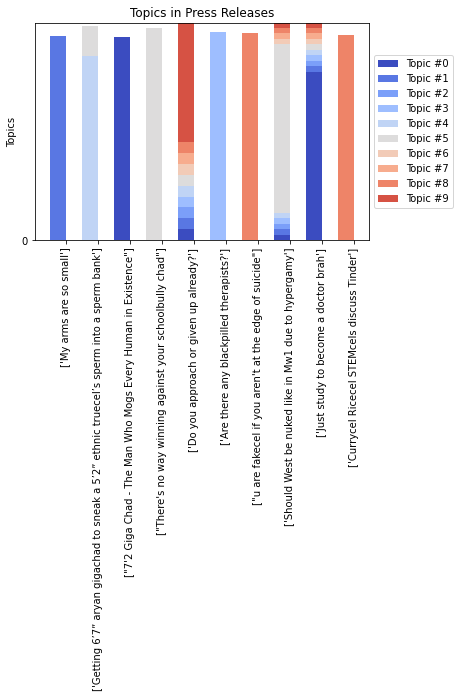

In [315]:
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, N))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  if sys.path[0] == '':
C:\Users\Zacha\anaconda3\envs\testing\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]


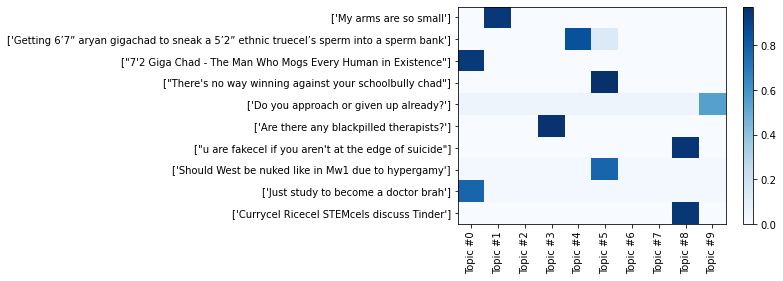

In [294]:
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [312]:
parents_lda = gensim.models.ldamodel.LdaModel(corpus=parents_mm, id2word=dictionary, num_topics=10, alpha=0.001, eta=0.01)
topicsDict = {}
for topicNum in range(parents_lda.num_topics):
    topicWords = [w for w, p in parents_lda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,fucking,fucking,women,life,people,chad,people,women,people,men
1,nt,life,white,fucking,shit,girl,good,men,women,women
2,sex,foids,men,men,chad,going,know,fucking,sex,foids
3,fuck,time,face,man,man,incel,want,want,nt,life
4,old,want,fucking,world,edited,people,think,shit,look,chad
5,guys,people,got,women,getting,think,man,look,person,guy
6,edited,guy,want,need,think,want,men,foids,man,edited
7,know,men,people,girls,incels,time,women,way,guys,foid
8,love,women,life,looks,love,ve,life,going,think,fucking
9,personality,girl,shit,getting,life,life,personality,people,men,consent


<Figure size 432x288 with 0 Axes>

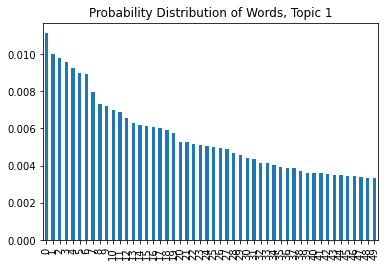

In [309]:
topic1_df = pd.DataFrame(parents_lda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

<Figure size 432x288 with 0 Axes>

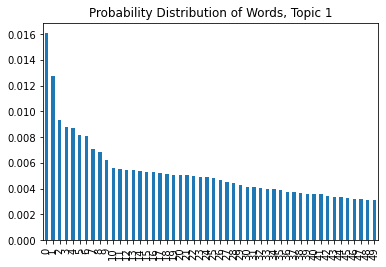

In [313]:
topic1_df = pd.DataFrame(parents_lda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()